In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("result/creditgrowth_recession.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  122 non-null    int64  
 1   DATE        122 non-null    object 
 2   GDP         122 non-null    float64
 3   diff_gdp    122 non-null    float64
 4   recession   122 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.9+ KB


In [4]:
# To drop columns based on the values in the "Unnamed: 0" column
df.drop(columns="Unnamed: 0", inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       122 non-null    object 
 1   GDP        122 non-null    float64
 2   diff_gdp   122 non-null    float64
 3   recession  122 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [6]:
df.describe()

,GDP,diff_gdp,recession
count,122.000000,122.000000,122.000000
mean,113.666393,0.422951,0.204918
std,14.293255,0.806358,0.405306
min,93.700000,-1.700000,0.000000
25%,99.550000,0.000000,0.000000
50%,118.550000,0.500000,0.000000
75%,124.075000,0.900000,0.000000
max,144.100000,2.700000,1.000000


In [7]:
df.rename(columns={"diff_gdp":"credit growth"}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           122 non-null    object 
 1   GDP            122 non-null    float64
 2   credit growth  122 non-null    float64
 3   recession      122 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [34]:
df['DATE'] = pd.to_datetime(df['DATE'])
transitions = df[(df['recession'].shift(-1) == 0) & (df['recession'] == 1)]
# Displaying the number of transition periods and the first transition period data
print(transitions)

print(df.head(20))

          DATE    GDP  credit growth  recession
11  1975-01-01   97.2           -1.4          1
32  1980-04-01  100.3           -0.5          1
40  1982-04-01  100.6            0.9          1
75  1991-01-01  124.3           -0.6          1
117 2001-07-01  140.3            2.0          1
         DATE   GDP  credit growth  recession
0  1972-04-01  93.7            1.2          0
1  1972-07-01  93.9            0.2          0
2  1972-10-01  94.6            0.7          0
3  1973-01-01  94.8            0.2          0
4  1973-04-01  95.8            1.0          0
5  1973-07-01  96.2            0.4          0
6  1973-10-01  96.3            0.1          1
7  1974-01-01  96.3            0.0          1
8  1974-04-01  97.9            1.6          1
9  1974-07-01  98.4            0.5          1
10 1974-10-01  98.6            0.2          1
11 1975-01-01  97.2           -1.4          1
12 1975-04-01  96.9           -0.3          0
13 1975-07-01  96.2           -0.7          0
14 1975-10-01  95.9   

In [151]:
last_index_before_1 = df[df['recession'].diff() == 1]

before_transition = []

for idx in last_index_before_1.index:
    start_index = max(idx - 4, 0)
    end_index = idx -1

    pre_change_period = df.loc[start_index:end_index]

    before_transition.append(pre_change_period)




        DATE   GDP  credit growth  recession
2 1972-10-01  94.6            0.7          0
3 1973-01-01  94.8            0.2          0
4 1973-04-01  95.8            1.0          0
5 1973-07-01  96.2            0.4          0
         DATE   GDP  credit growth  recession
24 1978-04-01  98.1            1.0          0
25 1978-07-01  98.4            0.3          0
26 1978-10-01  98.5            0.1          0
27 1979-01-01  97.8           -0.7          0
         DATE    GDP  credit growth  recession
32 1980-04-01  100.3           -0.5          1
33 1980-07-01  100.8            0.5          0
34 1980-10-01  101.4            0.6          0
35 1981-01-01  100.0           -1.4          0
         DATE    GDP  credit growth  recession
66 1988-10-01  124.8            0.7          0
67 1989-01-01  124.3           -0.5          0
68 1989-04-01  124.9            0.6          0
69 1989-07-01  124.6           -0.3          0
          DATE    GDP  credit growth  recession
111 2000-01-01  134.7      

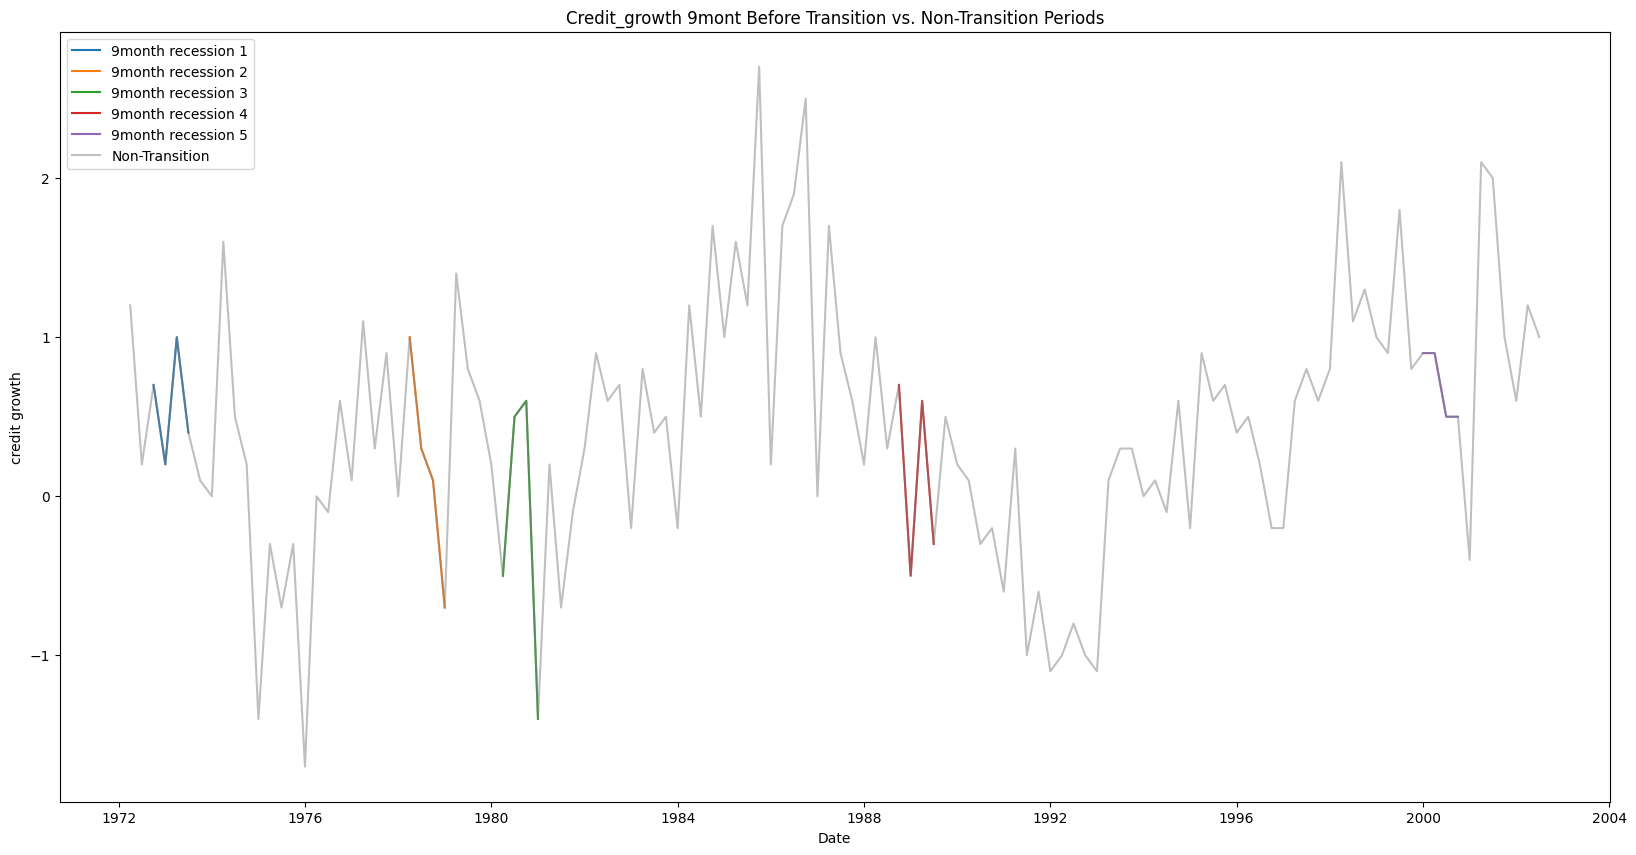

In [152]:
plt.figure(figsize=(20, 10), facecolor='white')
for i, period in enumerate(before_transition, 1):
    print(period)
    plt.plot(period['DATE'], period['credit growth'], label = f'9month recession {i}')


plt.plot(df['DATE'], df['credit growth'], label='Non-Transition', color='grey', alpha=0.5)
plt.title('Credit_growth 9mont Before Transition vs. Non-Transition Periods')

plt.xlabel('Date')
plt.ylabel('credit growth')
plt.legend()
plt.show()

In [153]:
before_transition_df = pd.concat(before_transition)

In [154]:
before_transition_df.describe()

,DATE,GDP,credit growth,recession
count,20,20.000000,2.000000e+01,20.000000
mean,1984-05-16 18:00:00,110.915000,2.750000e-01,0.050000
min,1972-10-01 00:00:00,94.600000,-1.400000e+00,0.000000
25%,1978-06-08 06:00:00,98.025000,-7.105427e-15,0.000000
50%,1980-08-16 00:00:00,100.550000,5.000000e-01,0.000000
75%,1989-04-23 18:00:00,124.825000,7.000000e-01,0.000000
max,2000-10-01 00:00:00,136.600000,1.000000e+00,1.000000
std,NaN,16.648701,6.447154e-01,0.223607


In [155]:
non_transition_data = df[~df['DATE'].isin(before_transition_df['DATE']) & df["recession"].diff() == 0]


In [156]:
non_transition_data

,DATE,GDP,credit growth,recession
0,1972-04-01,93.7,1.2,0
1,1972-07-01,93.9,0.2,0
2,1972-10-01,94.6,0.7,0
3,1973-01-01,94.8,0.2,0
4,1973-04-01,95.8,1.0,0
...,...,...,...,...
116,2001-04-01,138.3,2.1,1
117,2001-07-01,140.3,2.0,1
119,2002-01-01,141.9,0.6,0
120,2002-04-01,143.1,1.2,0


In [157]:
non_transition_data.describe()

,DATE,GDP,credit growth,recession
count,113,113.000000,113.000000,113.000000
mean,1987-06-20 16:08:29.734513280,113.684071,0.426549,0.176991
min,1972-04-01 00:00:00,93.700000,-1.700000,0.000000
25%,1980-01-01 00:00:00,99.700000,0.000000,0.000000
50%,1987-07-01 00:00:00,118.700000,0.500000,0.000000
75%,1995-01-01 00:00:00,123.800000,0.900000,0.000000
max,2002-07-01 00:00:00,144.100000,2.700000,1.000000
std,NaN,14.037428,0.823648,0.383361


In [158]:
from scipy.stats import ttest_ind

results_credit_growth = ttest_ind(before_transition_df['recession'], non_transition_data['recession'])


In [159]:

print('\nT-test results for Credit Growth:')
print('T-statistic:', results_credit_growth.statistic)
print('P-value:', results_credit_growth.pvalue)


T-test results for Credit Growth:
T-statistic: -1.435938736656697
P-value: 0.15340340034379493
